# **Bird Classification**

## Connect google drive and download data on Kaggle

In [ ]:
import pathlib 
import glob 

In [ ]:
# Upload the file "kaggle.json" file 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinjikido","key":"7907b2c9645a1dfe3f7cf84b98051fb1"}'}

In [ ]:
# Install kaggle package
!pip install --upgrade --force-reinstall --no-deps kaggle

# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # set permission

     |████████████████████████████████| 58 kB 4.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=9eedaba1b739bc7865470b73952dc7019853aee0416a651b806b7d192526834d
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# download data on Kaggle with option -p to choose the destination
!kaggle datasets download -d gpiosenka/100-bird-species

100% 1.08G/1.08G [00:07<00:00, 158MB/s]
100% 1.08G/1.08G [00:07<00:00, 148MB/s]


In [ ]:
# Now you can Unzip it!
!unzip -q /content/100-bird-species.zip -d '/content/Bird_classification'

## Create and overview train, valid, test data

In [ ]:
import zipfile
import os
import shutil
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
base_dir = '/content/Bird_classification'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
df = pd.read_csv('/content/Bird_classification/Bird Species.csv')

In [ ]:
# Overview class data on train, valid, test 
train_dir_ls = os.listdir(train_dir)
Validation_dir_ls = os.listdir(validation_dir)
test_dir_ls = os.listdir(test_dir)

print(train_dir_ls[:10])
print(Validation_dir_ls[:10])
print(test_dir_ls[:10])

['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']
['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']
['CURL CRESTED ARACURI', 'PARADISE TANAGER', 'NORTHERN SHOVELER', 'BLACK THROATED BUSHTIT', 'HORNED SUNGEM', 'SPLENDID WREN', 'BROWN CREPPER', 'HAWAIIAN GOOSE', 'MALEO', 'OVENBIRD']


In [ ]:
# we have total 300 classes
print('Total training bird images:', len(train_dir_ls))
print('Total valid bird images:', len(Validation_dir_ls))
print('Total test bird images:', len(test_dir_ls))

Total training bird images: 300
Total valid bird images: 300
Total test bird images: 300


In [ ]:
# overview data for each label
for i in os.listdir(train_dir):
    x = train_dir +'/'+ str(i)
    print("Total No of Images in {} are: {}".format(str(i),len(x)))

Total No of Images in PEACOCK are: 42
Total No of Images in VIOLET GREEN SWALLOW are: 55
Total No of Images in SRI LANKA BLUE MAGPIE are: 56
Total No of Images in MALAGASY WHITE EYE are: 53
Total No of Images in HAWAIIAN GOOSE are: 49
Total No of Images in BORNEAN BRISTLEHEAD are: 54
Total No of Images in OCELLATED TURKEY are: 51
Total No of Images in STRIPPED MANAKIN are: 51
Total No of Images in SHOEBILL are: 43
Total No of Images in PINK ROBIN are: 45
Total No of Images in BIRD OF PARADISE are: 51
Total No of Images in GOLDEN EAGLE are: 47
Total No of Images in EASTERN TOWEE are: 48
Total No of Images in CUBAN TODY are: 45
Total No of Images in HORNED LARK are: 46
Total No of Images in COMMON STARLING are: 50
Total No of Images in MASKED BOOBY are: 47
Total No of Images in CHUKAR PARTRIDGE are: 51
Total No of Images in COMMON FIRECREST are: 51
Total No of Images in GREEN JAY are: 44
Total No of Images in BANANAQUIT are: 45
Total No of Images in CALIFORNIA GULL are: 50
Total No of Im

we have a picture of each class that is different, there is an imbalance here but not much

Found 43622 files belonging to 300 classes.


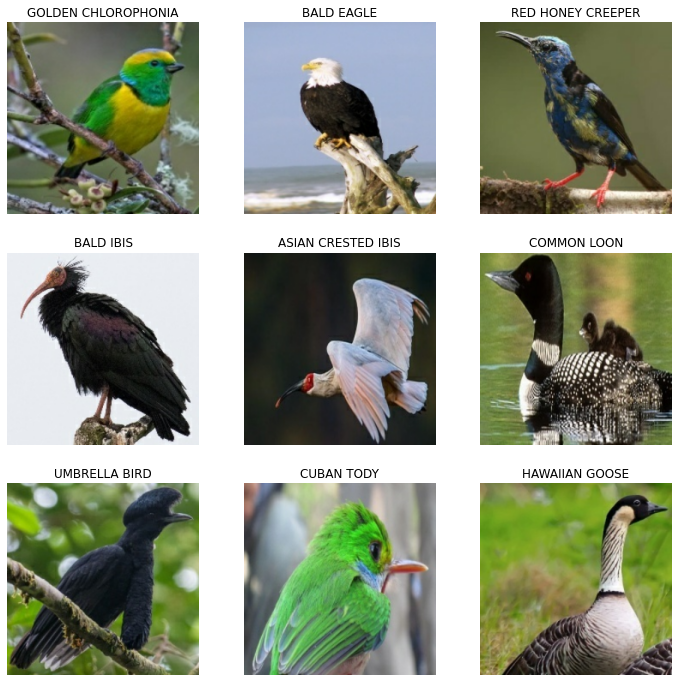

In [ ]:
# plot random image to view
image_size = (224, 224)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir)
class_names = train_dataset.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# import library


In [ ]:
from keras import optimizers
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input
from tensorflow import keras
from tensorflow.keras.models import  load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Define my Model

In [ ]:
# Data augmented

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = datagen.flow_from_directory(
                      train_dir,
                      target_size=(224, 224),
                      batch_size=32,
                      class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                      validation_dir,
                      target_size=(224, 224),
                      batch_size=32,
                      class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
                      test_dir,
                      target_size=(224, 224),
                      shuffle=False,
                      batch_size=32,
                      class_mode='categorical')

Found 43622 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.
Found 1500 images belonging to 300 classes.


In [ ]:
# check shape after data augmented
for data_batch, labels_batch in train_generator:
  print('Data batch shape:', data_batch.shape)
  print('Labels batch shape:', labels_batch.shape)
  break

Data batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 300)


In [ ]:
# Create my model
model_bird = tf.keras.Sequential([
                              layers.Conv2D(32, (11,11), activation='relu', input_shape=(224,224,3)),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Conv2D(64, (5,5), activation='relu'),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Conv2D(128, (5,5), activation='relu'),
                              layers.MaxPool2D(pool_size=(3,3),strides=(2,2)),
                              layers.Flatten(),
                              layers.Dense(1024, activation='relu'),
                              layers.Dense(300, activation='softmax')
])

In [ ]:
# Learning decay and model complie
opt = tf.keras.optimizers.SGD(learning_rate=0.001,
                              momentum=0.6,
                              nesterov=True)
model_bird.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

In [ ]:
# check summary of model
model_bird.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 214, 214, 32)      11648     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 106, 106, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 102, 102, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 128)       204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 61952)            

In [ ]:
# earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_bird.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.7,
                                 patience=2,
                                 verbose=1)])

Epoch 1/10
1364/1364 [==============================] - 442s 324ms/step - loss: 5.6818 - acc: 0.0053 - val_loss: 5.5958 - val_acc: 0.0087
Epoch 2/10
1364/1364 [==============================] - 441s 323ms/step - loss: 5.4062 - acc: 0.0184 - val_loss: 5.0143 - val_acc: 0.0353
Epoch 3/10
1364/1364 [==============================] - 441s 323ms/step - loss: 5.0327 - acc: 0.0442 - val_loss: 4.4024 - val_acc: 0.1053
Epoch 4/10
1364/1364 [==============================] - 440s 323ms/step - loss: 4.6804 - acc: 0.0790 - val_loss: 4.0108 - val_acc: 0.1587
Epoch 5/10
1364/1364 [==============================] - 440s 322ms/step - loss: 4.4228 - acc: 0.1096 - val_loss: 3.6538 - val_acc: 0.2093
Epoch 6/10
1364/1364 [==============================] - 440s 323ms/step - loss: 4.1768 - acc: 0.1391 - val_loss: 3.3931 - val_acc: 0.2660
Epoch 7/10
1364/1364 [==============================] - 440s 323ms/step - loss: 3.9651 - acc: 0.1734 - val_loss: 3.1033 - val_acc: 0.3000
Epoch 8/10
1364/1364 [============

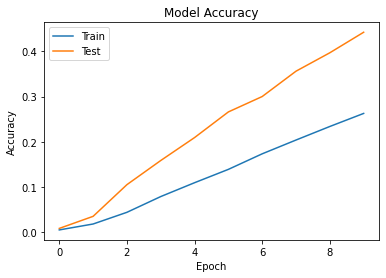

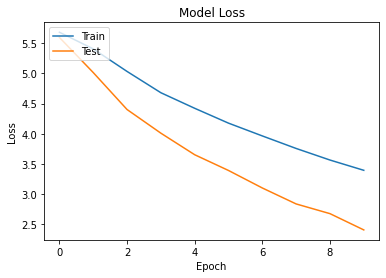

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Test'],loc='upper left')
plt.show()

# MobienetV2

In [ ]:
# download model mobienetv2
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
model_mobienetv2 = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# create data base again
BATCH_SIZE = 32
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE
                                             )
val_dataset = image_dataset_from_directory(validation_dir,
                                          shuffle=True,
                                          batch_size=BATCH_SIZE,
                                          image_size=IMG_SIZE
                                          )
test_dataset = image_dataset_from_directory(test_dir,
                                            shuffle=False,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE)

Found 43622 files belonging to 300 classes.
Found 1500 files belonging to 300 classes.
Found 1500 files belonging to 300 classes.


In [ ]:
val_batches = tf.data.experimental.cardinality(val_dataset)
test_dataset = val_dataset.take(val_batches // 5)
val_dataset = val_dataset.skip(val_batches // 5)
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 38
Number of test batches: 9


## Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

## data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

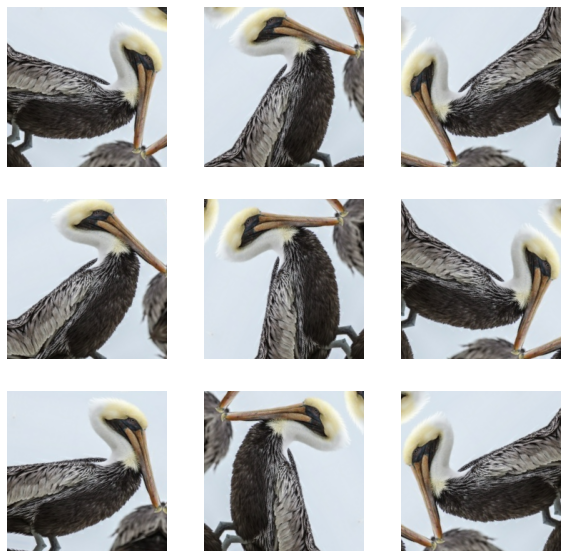

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = model_mobienetv2(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
model_mobienetv2.trainable = False

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = model_mobienetv2(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(300, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
loss0, accuracy0 = model.evaluate(val_dataset)

38/38 [==============================] - 3s 34ms/step - loss: 5.9714 - accuracy: 0.0025


In [ ]:
initial_epochs = 10
history_mobienetv2 = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/10
1364/1364 [==============================] - 50s 35ms/step - loss: 4.0029 - accuracy: 0.2690 - val_loss: 2.5421 - val_accuracy: 0.6658
Epoch 2/10
1364/1364 [==============================] - 48s 35ms/step - loss: 2.1417 - accuracy: 0.6236 - val_loss: 1.4905 - val_accuracy: 0.8020
Epoch 3/10
1364/1364 [==============================] - 48s 35ms/step - loss: 1.4880 - accuracy: 0.7268 - val_loss: 1.0066 - val_accuracy: 0.8581
Epoch 4/10
1364/1364 [==============================] - 48s 35ms/step - loss: 1.1798 - accuracy: 0.7707 - val_loss: 0.7793 - val_accuracy: 0.8919
Epoch 5/10
1364/1364 [==============================] - 48s 35ms/step - loss: 0.9884 - accuracy: 0.8001 - val_loss: 0.6313 - val_accuracy: 0.9051
Epoch 6/10
1364/1364 [==============================] - 48s 35ms/step - loss: 0.8700 - accuracy: 0.8164 - val_loss: 0.5536 - val_accuracy: 0.9117
Epoch 7/10
1364/1364 [==============================] - 48s 35ms/step - loss: 0.7888 - accuracy: 0.8288 - val_loss: 0.4892 -

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.

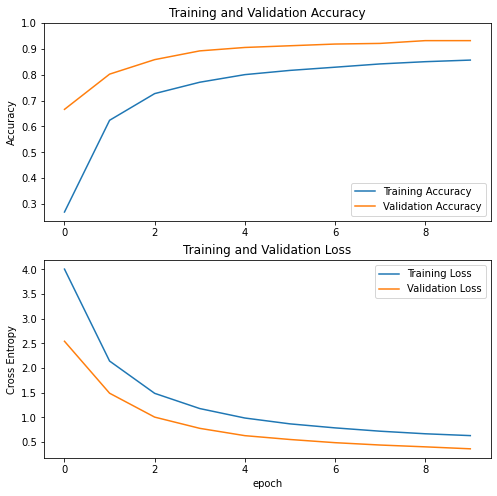

In [ ]:
acc = history_mobienetv2.history['accuracy']
val_acc = history_mobienetv2.history['val_accuracy']

loss = history_mobienetv2.history['loss']
val_loss = history_mobienetv2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Fine tuning

In [ ]:
model_mobienetv2.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(model_mobienetv2.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in model_mobienetv2.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history_mobienetv2.epoch[-1],
                         validation_data=val_dataset)

Epoch 10/20
1364/1364 [==============================] - 72s 50ms/step - loss: 0.4616 - accuracy: 0.8767 - val_loss: 0.1844 - val_accuracy: 0.9447
Epoch 11/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.3889 - accuracy: 0.8939 - val_loss: 0.1772 - val_accuracy: 0.9472
Epoch 12/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.3496 - accuracy: 0.9047 - val_loss: 0.1443 - val_accuracy: 0.9538
Epoch 13/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.3200 - accuracy: 0.9129 - val_loss: 0.1383 - val_accuracy: 0.9579
Epoch 14/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.2991 - accuracy: 0.9165 - val_loss: 0.1268 - val_accuracy: 0.9629
Epoch 15/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.2734 - accuracy: 0.9245 - val_loss: 0.1192 - val_accuracy: 0.9596
Epoch 16/20
1364/1364 [==============================] - 67s 49ms/step - loss: 0.2576 - accuracy: 0.9288 - val_loss: 0

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

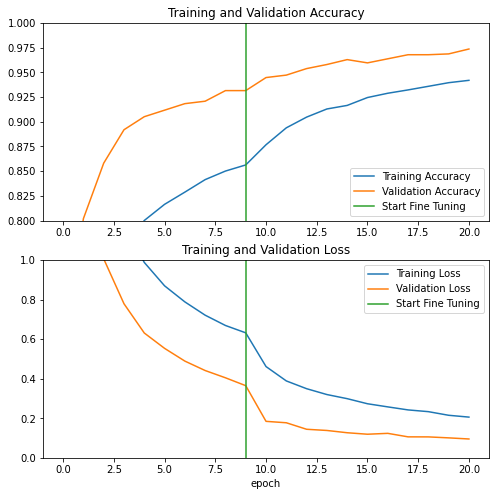

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction

Finaly you can verify the performance of the model on new data using test set.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

9/9 [==============================] - 0s 32ms/step - loss: 0.1837 - accuracy: 0.9479
Test accuracy : 0.9479166865348816


And now you are all set to use this model to predict if your pet is a cat or dog.

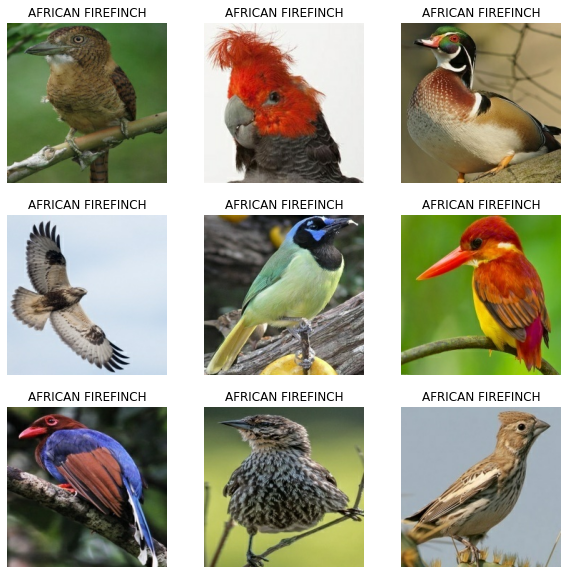

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")